In [65]:
#project borrowed from https://www.kaggle.com/aymanlafaz/titanic-kaggle-solution
# I do not own any code, this was a way for me to learn and understand machine 
#learning processes
#importing some useful libraries
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.shape

(891, 12)

In [14]:
test.shape

(418, 11)

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

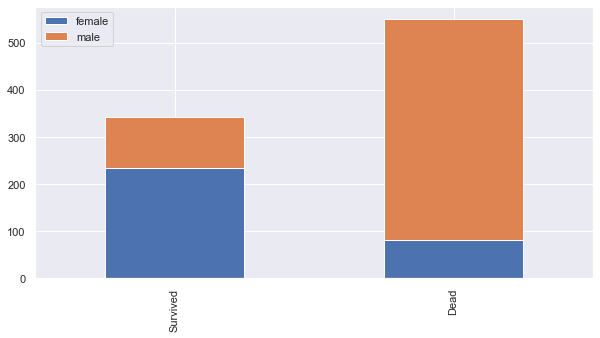

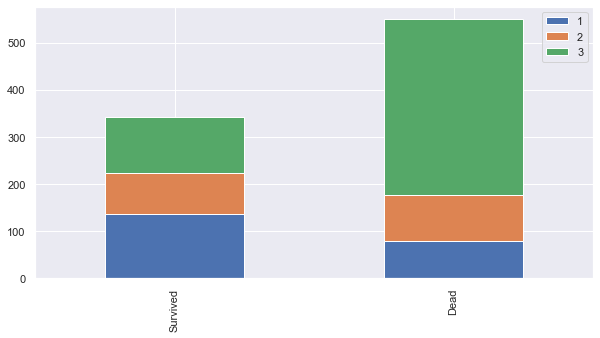

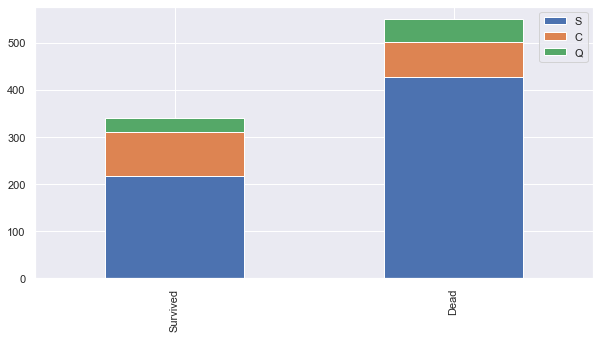

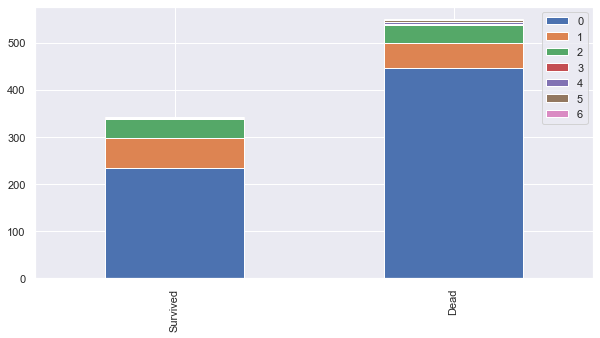

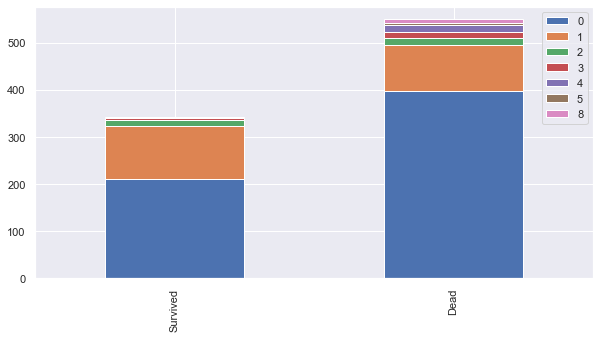

In [18]:
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Embarked')
bar_chart('Parch')
bar_chart('SibSp')

In [21]:
all_data = [train,test]
for data in all_data :
    data['Status'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
train.Status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [27]:
for dataset in all_data:
    dataset['Status'] = dataset['Status'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Status'] = dataset['Status'].replace('Mlle', 'Miss')
    dataset['Status'] = dataset['Status'].replace('Ms', 'Miss')
    dataset['Status'] = dataset['Status'].replace('Mme', 'Mrs')

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
status           0
Status           0
dtype: int64

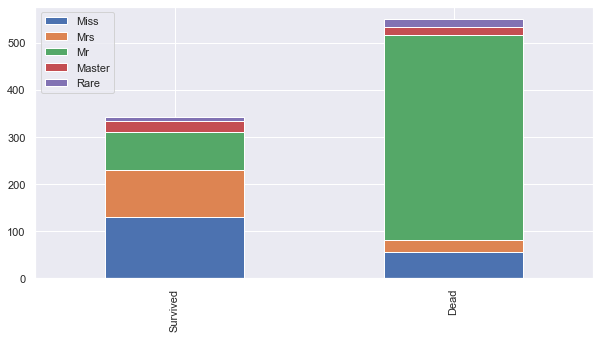

In [34]:
test.head(10)
bar_chart('Status')

In [35]:
status_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Status'] = dataset['Status'].map(status_mapping)
    dataset['Status'] = dataset['Status'].fillna(0)

In [36]:
train.Status.unique()

array([1, 3, 2, 4, 5], dtype=int64)

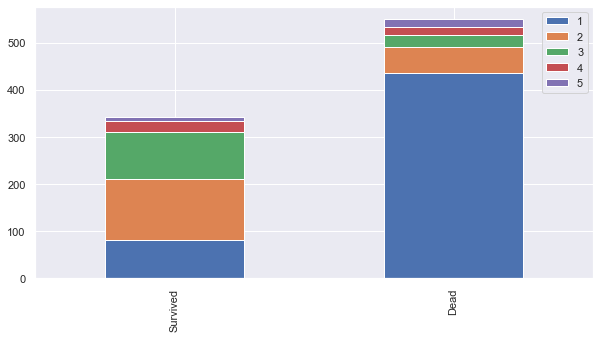

In [37]:
bar_chart('Status')

In [38]:
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test ['SibSp'] + test['Parch'] + 1

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,status,Status,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1


In [40]:
sex_mapping = {"male": 0, "female": 1}
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
for dataset in all_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [41]:
train['LastName'] = train.Name.str.split(',').str[0]
test['LastName'] = test.Name.str.split(',').str[0]

#train['Name_length'] = train['Name'].apply(len)
#test['Name_length'] = test['Name'].apply(len)
#train['Last_Name'] =train['Name'].apply(lambda x: str.split(x, ".")[1].split()[0])
#test['Last_Name'] =test['Name'].apply(lambda x: str.split(x, ".")[1].split()[0])

train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

In [42]:
train['Cabin_category'] = train['Cabin'].astype(str).str[0]
train['Cabin_category'] = train['Cabin_category'].map({'A':1,'B':2,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
train['Cabin_category'] = train['Cabin_category'].fillna(0)
# Cabin Grouping 
train['HasCabin'] = train['Cabin'].apply(lambda x:0 if x is np.nan else 1)


test['Cabin_category'] = test['Cabin'].astype(str).str[0]
test['Cabin_category'] = test['Cabin_category'].map({'A':1,'B':2,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
test['Cabin_category'] = test['Cabin_category'].fillna(0)
# Cabin Grouping 
test['HasCabin'] = test['Cabin'].apply(lambda x:0 if x is np.nan else 1)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,status,Status,FamilySize,IsAlone,LastName,Cabin_category,HasCabin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2,0,Braund,0.0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,0,Cumings,2.0,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1,1,Heikkinen,0.0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,0,Futrelle,2.0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,Allen,0.0,0


In [44]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
status              0
Status              0
FamilySize          0
IsAlone             0
LastName            0
Cabin_category      0
HasCabin            0
dtype: int64

In [45]:
train["Age"].fillna(train.groupby("Status")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Status")["Age"].transform("median"), inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace = True)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train['Embarked'].fillna('S', inplace = True)
test['Embarked'].fillna('S', inplace = True)

In [46]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
status              0
Status              0
FamilySize          0
IsAlone             0
LastName            0
Cabin_category      0
HasCabin            0
dtype: int64

In [47]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
status              0
Status              0
FamilySize          0
IsAlone             0
LastName            0
Cabin_category      0
HasCabin            0
dtype: int64

In [48]:
train.groupby("Status")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    48.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

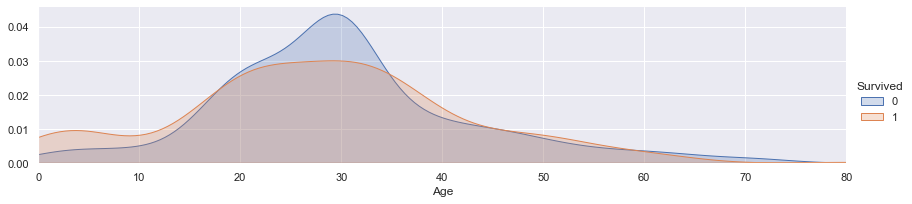

In [49]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

(0.0, 20.0)

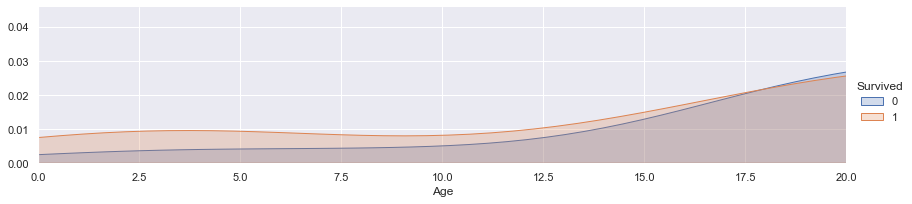

In [50]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

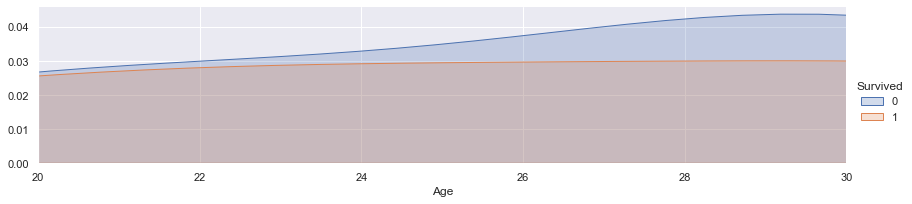

In [51]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

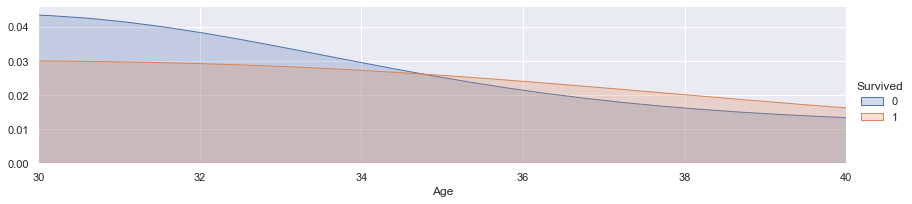

In [52]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

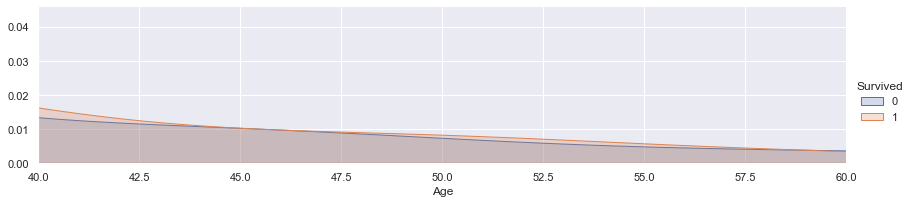

In [53]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,status,Status,FamilySize,IsAlone,LastName,Cabin_category,HasCabin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2,0,Braund,0.0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,0,Cumings,2.0,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1,1,Heikkinen,0.0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,0,Futrelle,2.0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,Allen,0.0,0


In [55]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [56]:
y_full = train["Survived"]

features = ["Pclass","Sex", "Age","IsAlone", "FamilySize", "Status","Embarked","Fare","Cabin_category","HasCabin"]
X_full = pd.get_dummies(train[features])
X_test_full = pd.get_dummies(test[features])

X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.8, test_size=0.2,random_state=0)

X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)

In [57]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=3)

In [58]:
model.fit(X_train,y_train)
val_predictions = model.predict(X_valid)

In [59]:
accuracy = accuracy_score(val_predictions,y_valid)

In [60]:
accuracy

0.7932960893854749

In [61]:
model.fit(X_full, y_full)
predictions = model.predict(X_test_full)

In [62]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)